<a href="https://colab.research.google.com/github/KrishnaPavaniMunta/YOLO_car_detection/blob/main/Car_detection_using_YOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Clone YOLOv5 repository
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5

# Install dependencies
!pip install -r requirements.txt


Cloning into 'yolov5'...
remote: Enumerating objects: 17511, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 17511 (delta 5), reused 0 (delta 0), pack-reused 17494 (from 4)
Receiving objects: 100% (17511/17511), 16.62 MiB | 7.92 MiB/s, done.
Resolving deltas: 100% (12000/12000), done.
/content/yolov5/yolov5


In [ ]:
import torch
from IPython.display import Image, display

# Load a pre-trained YOLOv5s model (small and fast)
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

# Inference on a sample image
img_url = 'https://d1bat1ruswunxz.cloudfront.net/app/uploads/2020/10/w0mfSbxYR4QK5gGHnUOd7mu0Ht316FqX1596131114.jpg'
results = model(img_url)
print("Inference done. Ready to visualize manually.")

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2025-7-8 Python-3.11.13 torch-2.6.0+cu124 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Inference done. Ready to visualize manually.


# **Bounding Box Regression**

In [ ]:
# Get the pandas dataframe of detections
df = results.pandas().xyxy[0]

# Filter only 'car' detections
car_detections = df[df['name'] == 'car']

# Display car detections
print("Car Detections:")
print(car_detections)


Car Detections:
          xmin        ymin        xmax        ymax  confidence  class name
0   246.693115  130.409363  290.545685  164.609955    0.771316      2  car
1    14.485158  269.887451  111.388123  337.690704    0.761031      2  car
3   281.378815  274.868439  357.313934  347.443878    0.738017      2  car
4   638.183350  346.415039  712.000000  399.913910    0.731653      2  car
5   450.589386  275.845276  526.402466  342.589935    0.728435      2  car
6   340.536591  121.666718  374.543762  151.761047    0.715392      2  car
7   331.949738  164.664032  379.978241  204.453934    0.711875      2  car
8   630.465942   43.112579  653.559143   61.254486    0.675407      2  car
9   421.449524  159.830612  468.142609  199.959076    0.637371      2  car
10  283.597504   78.845581  310.076874  101.923912    0.618573      2  car
11  412.544403  106.526833  450.033905  142.290512    0.522432      2  car
12  339.308563   71.093864  366.788483   96.822540    0.453405      2  car
13  462.9

In [ ]:
%matplotlib inline


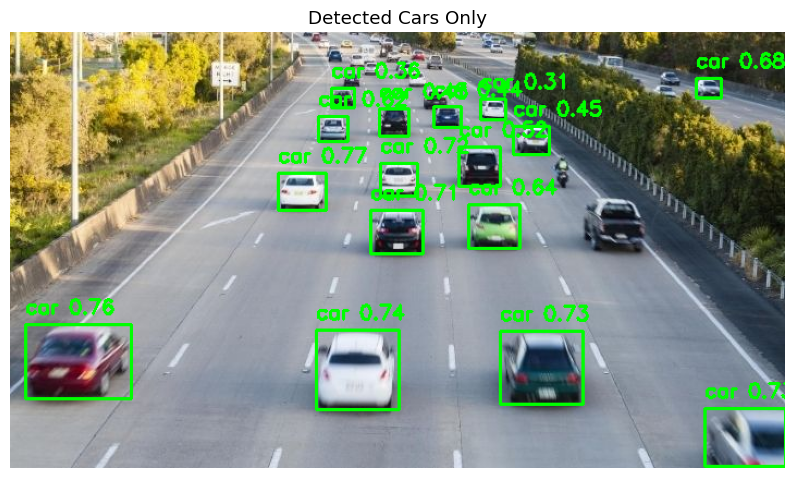

In [ ]:
import cv2
import numpy as np
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

# Load the image from the URL
response = requests.get(img_url)
img_array = np.array(Image.open(BytesIO(response.content)).convert('RGB'))

# Make a copy to draw on
img_copy = img_array.copy()

# Draw car bounding boxes
for _, row in car_detections.iterrows():
    xmin, ymin, xmax, ymax = map(int, [row['xmin'], row['ymin'], row['xmax'], row['ymax']])
    confidence = row['confidence']
    label = f"car {confidence:.2f}"

    cv2.rectangle(img_copy, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)
    cv2.putText(img_copy, label, (xmin, ymin - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

# Show the image
plt.figure(figsize=(10, 8))
plt.imshow(img_copy)
plt.axis('off')
plt.title("Detected Cars Only")
plt.show()


In [ ]:
from google.colab import files
uploaded = files.upload()


In [ ]:
# Get the uploaded file name
uploaded_filename = list(uploaded.keys())[0]
print(f"Using image: {uploaded_filename}")

# Run inference
results = model(uploaded_filename)

# Show all detections
results.print()
results.show()


IndexError: list index out of range

In [ ]:
# Filter predictions with confidence > 0.5
confidence_thresh = 0.5
strong_detections = df[df['confidence'] > confidence_thresh]

# Show the filtered results
print("Filtered Detections (confidence > 0.5):")
print(strong_detections)


Filtered Detections (confidence > 0.5):
          xmin        ymin        xmax        ymax  confidence  class   name
0   246.693115  130.409363  290.545685  164.609955    0.771316      2    car
1    14.485158  269.887451  111.388123  337.690704    0.761031      2    car
2   524.937866  152.744080  584.099548  202.753342    0.756724      7  truck
3   281.378815  274.868439  357.313934  347.443878    0.738017      2    car
4   638.183350  346.415039  712.000000  399.913910    0.731653      2    car
5   450.589386  275.845276  526.402466  342.589935    0.728435      2    car
6   340.536591  121.666718  374.543762  151.761047    0.715392      2    car
7   331.949738  164.664032  379.978241  204.453934    0.711875      2    car
8   630.465942   43.112579  653.559143   61.254486    0.675407      2    car
9   421.449524  159.830612  468.142609  199.959076    0.637371      2    car
10  283.597504   78.845581  310.076874  101.923912    0.618573      2    car
11  412.544403  106.526833  450.0339

In [ ]:
car_detections_strong = strong_detections[strong_detections['name'] == 'car']
print("High-confidence Car Detections:")
print(car_detections_strong)


High-confidence Car Detections:
          xmin        ymin        xmax        ymax  confidence  class name
0   246.693115  130.409363  290.545685  164.609955    0.771316      2  car
1    14.485158  269.887451  111.388123  337.690704    0.761031      2  car
3   281.378815  274.868439  357.313934  347.443878    0.738017      2  car
4   638.183350  346.415039  712.000000  399.913910    0.731653      2  car
5   450.589386  275.845276  526.402466  342.589935    0.728435      2  car
6   340.536591  121.666718  374.543762  151.761047    0.715392      2  car
7   331.949738  164.664032  379.978241  204.453934    0.711875      2  car
8   630.465942   43.112579  653.559143   61.254486    0.675407      2  car
9   421.449524  159.830612  468.142609  199.959076    0.637371      2  car
10  283.597504   78.845581  310.076874  101.923912    0.618573      2  car
11  412.544403  106.526833  450.033905  142.290512    0.522432      2  car


In [ ]:
import torchvision.ops as ops
import torch

# Convert DataFrame values to tensor format for torchvision NMS
boxes = torch.tensor(car_detections_strong[['xmin', 'ymin', 'xmax', 'ymax']].values)
scores = torch.tensor(car_detections_strong['confidence'].values)

# Apply Non-Max Suppression
iou_threshold = 0.5
nms_indices = ops.nms(boxes, scores, iou_threshold)

# Keep only boxes that survived NMS
nms_car_detections = car_detections_strong.iloc[nms_indices.numpy()]

print("After NMS:")
print(nms_car_detections)


After NMS:
          xmin        ymin        xmax        ymax  confidence  class name
0   246.693115  130.409363  290.545685  164.609955    0.771316      2  car
1    14.485158  269.887451  111.388123  337.690704    0.761031      2  car
3   281.378815  274.868439  357.313934  347.443878    0.738017      2  car
4   638.183350  346.415039  712.000000  399.913910    0.731653      2  car
5   450.589386  275.845276  526.402466  342.589935    0.728435      2  car
6   340.536591  121.666718  374.543762  151.761047    0.715392      2  car
7   331.949738  164.664032  379.978241  204.453934    0.711875      2  car
8   630.465942   43.112579  653.559143   61.254486    0.675407      2  car
9   421.449524  159.830612  468.142609  199.959076    0.637371      2  car
10  283.597504   78.845581  310.076874  101.923912    0.618573      2  car
11  412.544403  106.526833  450.033905  142.290512    0.522432      2  car


**Rule-Based Interpretation – Flag Cars Breaking Rules**

Let’s simulate a rule such as:

If a car is partially outside the road area (e.g., on pavement), flag it as a violation.

To do this, we:

1. Define the allowed region (road area).

2. Check if the car bounding box is inside, touching, or outside it.

Example:
Assume the road is the middle 70% of the image width. Anything outside is a potential rule violation.






In [ ]:
# Get image width (assuming image was read as img_copy earlier)
img_width = img_copy.shape[1]

# Define allowed road zone (middle 70% horizontally)
road_xmin = int(0.15 * img_width)
road_xmax = int(0.85 * img_width)

def is_violation(xmin, xmax):
    return xmin < road_xmin or xmax > road_xmax

# Apply the rule to each car box
nms_car_detections['violation'] = nms_car_detections.apply(
    lambda row: is_violation(row['xmin'], row['xmax']), axis=1
)


# Print rule violations
print("Rule Violations (Cars outside road):")
print(nms_car_detections[nms_car_detections['violation'] == True])


Rule Violations (Cars outside road):
         xmin        ymin        xmax        ymax  confidence  class name  \
1   14.485158  269.887451  111.388123  337.690704    0.761031      2  car   
4  638.183350  346.415039  712.000000  399.913910    0.731653      2  car   
8  630.465942   43.112579  653.559143   61.254486    0.675407      2  car   

   violation  
1       True  
4       True  
8       True  


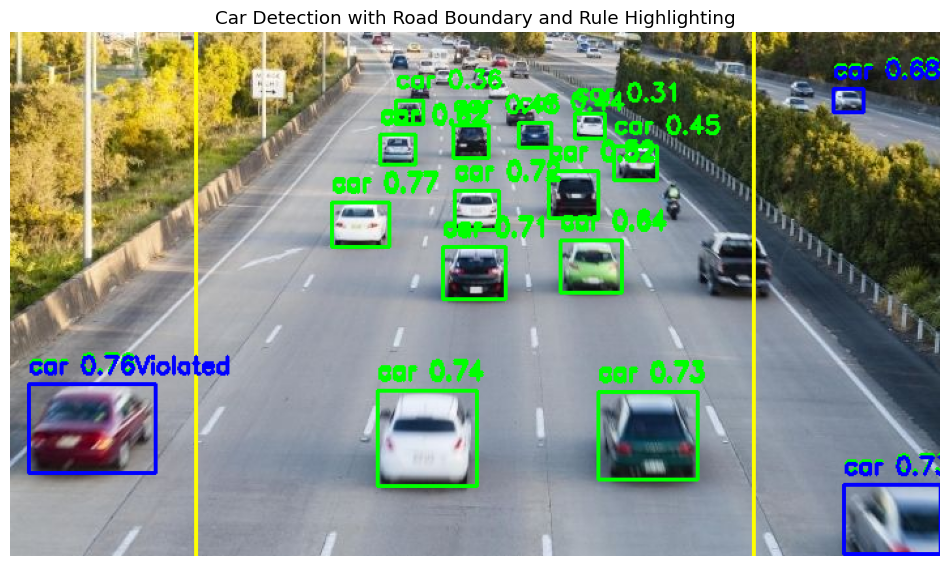

In [ ]:
# Create a clean copy of the image
img_fixed = img_copy.copy()

# Get image dimensions
img_height, img_width = img_fixed.shape[:2]

# Define road zone: tweak 0.2 and 0.8 to make it stricter
road_xmin = int(0.2 * img_width)
road_xmax = int(0.8 * img_width)

# Draw road zone boundaries for visualization (yellow lines)
cv2.line(img_fixed, (road_xmin, 0), (road_xmin, img_height), (255, 255, 0), 2)
cv2.line(img_fixed, (road_xmax, 0), (road_xmax, img_height), (255, 255, 0), 2)

# Re-check and label each car
for _, row in nms_car_detections.iterrows():
    xmin, ymin, xmax, ymax = map(int, [row['xmin'], row['ymin'], row['xmax'], row['ymax']])
    confidence = row['confidence']
    is_violator = row['violation']

    # Choose color based on rule
    color = (0, 0, 255) if is_violator else (0, 255, 0)
    label = f"car {confidence:.2f}" + ("Violated" if is_violator else "")

    # Draw box and label
    cv2.rectangle(img_fixed, (xmin, ymin), (xmax, ymax), color, 2)
    cv2.putText(img_fixed, label, (xmin, ymin - 8), cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)

# Display the image
plt.figure(figsize=(12, 8))
plt.imshow(img_fixed)
plt.axis('off')
plt.title("Car Detection with Road Boundary and Rule Highlighting")
plt.show()
